# Modelo Projeto de Data Science Classificação - Avançado

Este é um python notebook desenvolvido por Nícolas Mikio com o objetivo de ensinar as pessoas a desenvolverem projetos de data science.

Utilizei a base "Heart Disease UCI" para desenvolver modelos a fim de resolver um problema de classificação.

## Conteúdo

Avançado - Classificação
- Tratamento dos Dados
- Resampling
- Regressão Logística (com RFE)
- Regression Tree
- Random Forest
- XGboost
- Validação com Cross-Validation
- Grid Search e Random Search
- Validação treino e teste (ROC e AUC, matriz de confusão, acurácia, etc.)

## Base de Dados

303 rows × 14 columns

- age
- sex
- chest pain type (4 values)
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
- resting blood pressure (in mm Hg on admission to the hospital)
- serum cholestoral (in mg/dl)
- fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- resting electrocardiographic results (values 0,1,2)
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach = maximum heart rate achieved 
- exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
- ca: number of major vessels (0-3) colored
- thal: 
-- 3 = normal; 
-- 6 = fixed defect; 
-- 7 = reversable defect
- target: 1 or 0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
plt.style.use('dark_background')

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
print("A proporção target==1 sobre o total é", round(len(df[df["target"]==1])/len(df)*100,2), "%")

A proporção target==1 sobre o total é 54.46 %


### Matriz de Correlação

Por quê não usar o pd.corr?

R: Ele calcula a correlação de pearson ou spearman (postos), logo não pode ser usada para correlacionar variáveis qualitativas.

Vamos usar outro recurso.

dython: nominal.associations

Calculate the correlation/strength-of-association of features in data-set with both categorical and continuous features using: 
- Pearson's R for continuous-continuous cases 
- Correlation Ratio for categorical-continuous cases 
- Cramer's V or Theil's U for categorical-categorical cases

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df_quali = df.drop(columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

In [8]:
df_teste = df.copy()
for i in df_quali:
    df_teste[i] = df_teste[i].astype(str)

In [9]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 33.3+ KB


In [10]:
from dython import nominal

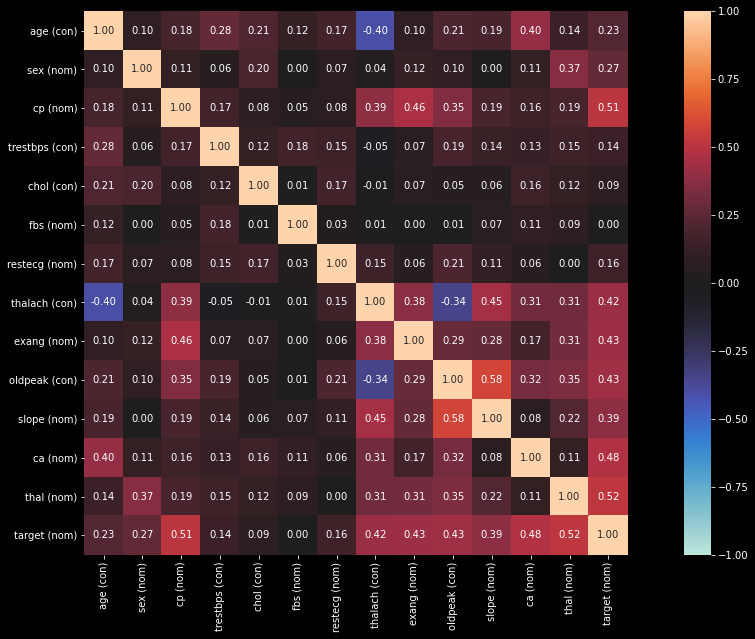

In [11]:
nominal.associations(df_teste, figsize=(20,10),mark_columns=True);

## Estudo das variáveis qualitativas

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
# já tinha criado
df_quali = df.drop(columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak', "ca"])

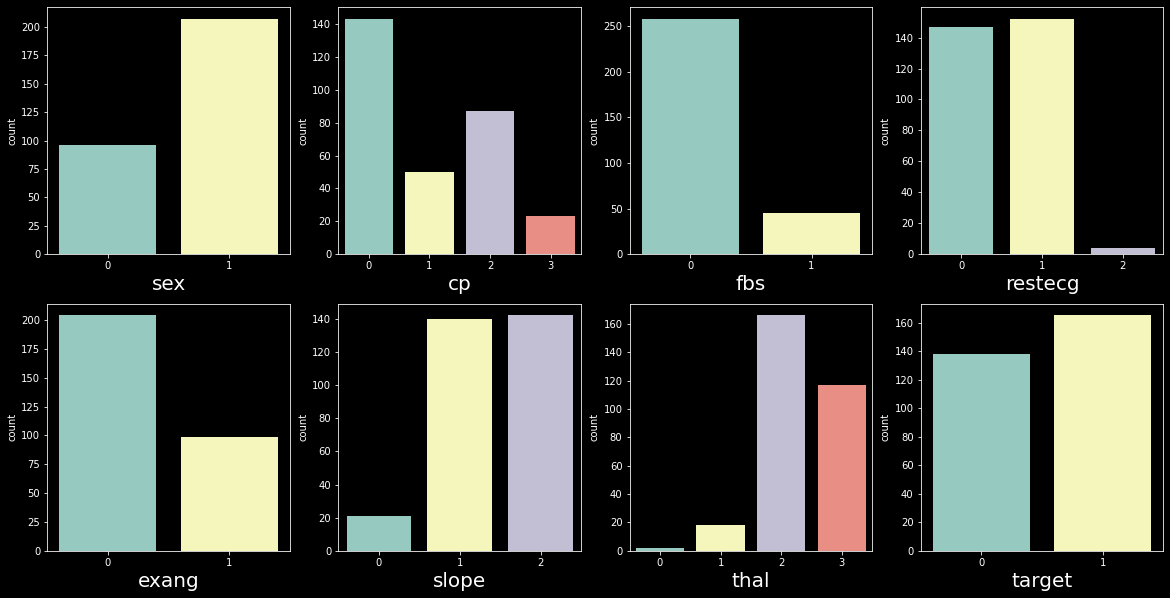

In [14]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in df_quali:
    if plotnumber<= len (df_quali.columns):
        ax=plt.subplot(2,4,plotnumber)
        sns.countplot(x=df_quali[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [15]:
for i in df_quali.columns:
    print(df_quali['%s' %(i)].value_counts())
    print('')

1    207
0     96
Name: sex, dtype: int64

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

0    258
1     45
Name: fbs, dtype: int64

1    152
0    147
2      4
Name: restecg, dtype: int64

0    204
1     99
Name: exang, dtype: int64

2    142
1    140
0     21
Name: slope, dtype: int64

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

1    165
0    138
Name: target, dtype: int64



In [16]:
# Cross Table e Teste Qui-Quadrado
for i in df_quali.columns:
    table, results = rp.crosstab(df_quali['%s' %(i)], df_quali['target'], prop= 'row', test= 'chi-square')
    print (table)
    print('')
    print (results)
    print('')
    print('------------------------------------')
    print('')

       target              
target      0      1    All
sex                        
0       25.00  75.00  100.0
1       55.07  44.93  100.0
All     45.54  54.46  100.0

                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   23.9144
1                    p-value =    0.0000
2               Cramer's phi =    0.2809

------------------------------------

       target              
target      0      1    All
cp                         
0       72.73  27.27  100.0
1       18.00  82.00  100.0
2       20.69  79.31  100.0
3       30.43  69.57  100.0
All     45.54  54.46  100.0

                Chi-square test  results
0  Pearson Chi-square ( 3.0) =   81.6864
1                    p-value =    0.0000
2                 Cramer's V =    0.5192

------------------------------------

       target              
target      0      1    All
fbs                        
0       44.96  55.04  100.0
1       48.89  51.11  100.0
All     45.54  54.46  100.0

                Chi-square test

## Estudo das variáveis quantitativas

In [17]:
df_quant = df.loc[:,['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']]
df_quant

,age,trestbps,chol,thalach,oldpeak,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,0
301,57,130,131,115,1.2,0


In [18]:
df_quant.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


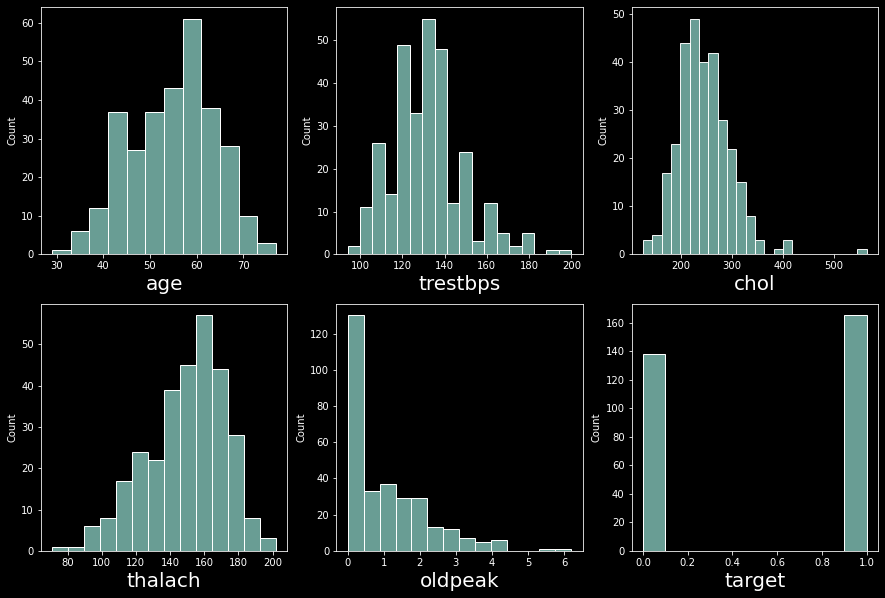

In [19]:
plt.figure(figsize=(15,10))
plotnumber=1

for column in df_quant:
    if plotnumber<= len (df_quant.columns):
        ax=plt.subplot(2,3,plotnumber)
        sns.histplot(x=df_quant[column], data = df_quant)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

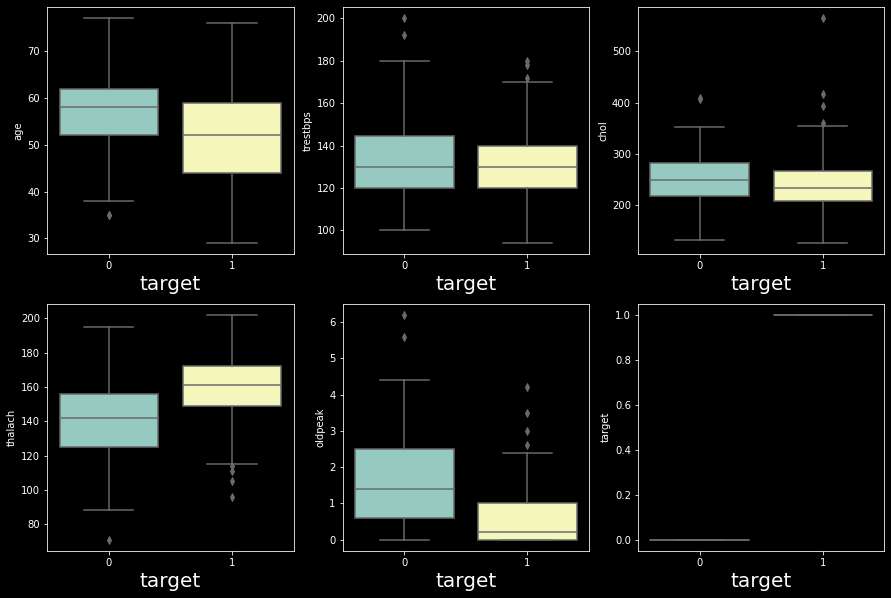

In [20]:
plt.figure(figsize=(15,10))
plotnumber=1

for column in df_quant:
    if plotnumber<= len (df_quant.columns):
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(y=df_quant[column], x=df_quant['target'], data = df_quant)
        plt.xlabel("target",fontsize=20)
    plotnumber+=1
plt.show()

# Modelagem

## Resampling

As técnicas de reamostragem são utilizadas para equilibrar as proporções entre as classes da variável a ser predita.
Atrapalhando o modelo na identificação da verdade classes das variáveis.

Exemplo: Se na base há mais casos target == 1 do que 0

Irei exemplificar uma técnica chamada Random Over Sampling para inputar novos dados aleatórios em minha base de teste.

Mais técnicas podem ser lidas em:

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [21]:
# Separar a base em treino e teste

train, test = train_test_split(df, test_size=0.25, random_state=1)

In [22]:
# Separar base de treino pelas classes

train_class_0 = train[train['target'] == 0]
train_class_1 = train[train['target'] == 1]

In [23]:
print("O número de target==0 é", round(len(train_class_0)))
print("O número de target==1 é", round(len(train_class_1)))
print("A proporção target==1 sobre o total na base de teste é", round(len(train_class_0)/len(train)*100,2), "%")

O número de target==0 é 103
O número de target==1 é 124
A proporção target==1 sobre o total na base de teste é 45.37 %


Random over-sampling:
0    124
1    124
Name: target, dtype: int64


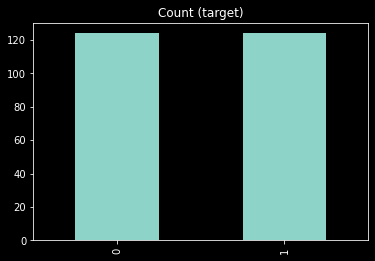

In [24]:

count_class_1, count_class_0 = train.target.value_counts()

train_class_0_over = train_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([train_class_1, train_class_0_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)');

Obs: Esse método deve ser usado somente na base de treino!

### Validação do modelo:

As validações dos modelos com base em datasets desbalanceados deve ser feita de forma diferentes, pois os casos específicos (raros) ocorrem menos vezes, desbalanceando o cálculo dos indicadores (acurácia, recall, etc).

Não irei tratar nesse treinamento como implementar a validação em bases desbalanceadas, sugiro procurar artigos.

Recomendações:
- https://machinelearningmastery.com/cross-validation-for-imbalanced-classification/

Exemplo de matriz de confusão a partir do resultado da modelagem de um caso raro

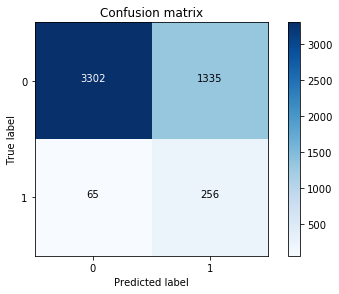

## Regressão Logística

### Gerar as Dummies (do português dos bares "dummieficar")

In [25]:
# já tinha criado
df_quali = df.drop(columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target'])

In [26]:
df_lr = df.copy()

In [27]:
for column in df_quali:
    df_lr[column] = df[column].astype(str)

In [28]:
df_lr = pd.get_dummies(df_lr)

### Sampling

Amostrar os dados da base df em treino e teste. Também separar a base entre "X" conjunto de variáveis dependentes e "y" a variável dependente (target)

In [29]:
# Separando a base
y = df_lr.loc[:,'target']
X = df_lr.drop(columns=['target'])

In [30]:
# Lib já importada 
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Treinando Modelo

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
# Usei max_iter = 1000 pois o default de máximos 100 interações não eram suficientes para o algorítmo convergir
logit = LogisticRegression(random_state=0, max_iter=1000)
logit.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

### Selecionando variáveis (Feature Selection) usando RFE

RFE é uma técnica de seleção de variáveis que rankeia as melhores variáveis do modelo.

Pode ser lido com mais detalhes nesse site:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [33]:
# Importar Lib
from sklearn.feature_selection import RFE

In [34]:
# Seleção de Variáveis 
rfe = RFE(logit, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

# Resumo dos melhores atributos
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[False False False False  True  True  True  True False  True  True False
 False False False False False  True False  True False  True  True  True
  True  True False False  True  True]
[13 14 16 12  1  1  1  1 11  1  1 10  6 15  5  3  2  1  8  1  4  1  1  1
  1  1  7  9  1  1]


Index(['oldpeak', 'sex_0', 'sex_1', 'cp_0', 'cp_2', 'cp_3', 'exang_1',
       'slope_1', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_2', 'thal_3'],
      dtype='object')

In [35]:
logit_RFE = LogisticRegression(random_state=0, max_iter=1000)
X_train_RFE = X_train[X_train.columns[rfe.support_]]
logit_RFE = logit_RFE.fit(X_train_RFE, y_train)

### Validação do Modelo

In [36]:
X_test_RFE = X_test[X_test.columns[rfe.support_]]
y_pred = logit_RFE.predict(X_test_RFE)
y_predproba = logit_RFE.predict_proba(X_test_RFE)

In [37]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [38]:
y_predproba = pd.DataFrame(y_predproba)
y_predproba

,0,1
0,0.871871,0.128129
1,0.313923,0.686077
2,0.271161,0.728839
3,0.989281,0.010719
4,0.919786,0.080214
...,...,...
71,0.042547,0.957453
72,0.069846,0.930154
73,0.970415,0.029585
74,0.915650,0.084350


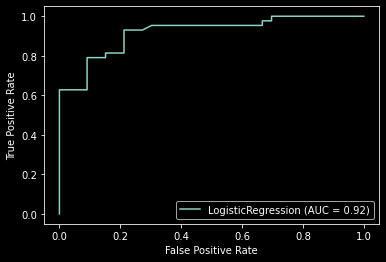

In [39]:
plot_roc_curve(logit_RFE, X_test_RFE, y_test)

Confusion matrix:
 [[26  7]
 [ 5 38]]


<ipython-input-40-b9c5a72f4b28>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-40-b9c5a72f4b28>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


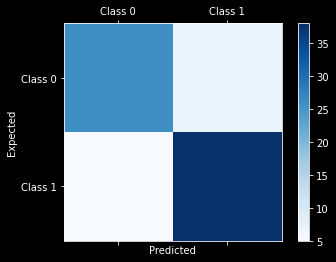

In [40]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))

Accuracy: 84.21%
Recall: 88.37%


### Gráfico para seleção de Ponto de Corte

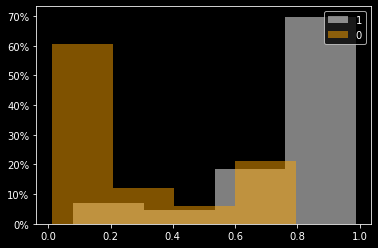

In [42]:
y_predproba['Target'] = y_test.array
um = y_predproba[y_predproba["Target"]==1][1]
zero = y_predproba[y_predproba["Target"]==0][1]

import matplotlib.ticker as mtick
plt.hist(um, color="white", bins = 4, alpha=0.5, label='1', weights=np.ones(len(um)) / len(um))
plt.hist(zero, color="orange", bins =4, alpha=0.5, label='0', weights=np.ones(len(zero)) / len(zero))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.legend(loc='upper right')
plt.show()

## Support Vector Machine (SVM)

Explicação do que é SVM: https://www.youtube.com/watch?v=efR1C6CvhmE&ab_channel=StatQuestwithJoshStarmer

### Tratando os dados usando Padronização

Antes de modelar com o algoritmo de Árvore de Decisão decidi padronizar os dados quantitativos.

Vale ressaltar que isso não é necessário, foi uma decisão minha.

Outras técnicas de pré processamento podem ser lidas em:
https://scikit-learn.org/stable/modules/preprocessing.html

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
df_quant = df_quant.drop(columns="target")

In [45]:
for cols in df_quant:
    print (cols)

age
trestbps
chol
thalach
oldpeak


In [46]:
scaler = StandardScaler()

In [47]:
df_svm = df.copy()
cols = df_quant.columns

scaler.fit(df_svm[cols])
df_svm = pd.DataFrame(scaler.transform(df_svm[cols]),columns=cols)
df_svm = pd.concat([df_svm, df.drop(columns=cols)], axis=1)

df_svm

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,3,1,0,0,0,0,1,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,2,0,1,0,0,0,2,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,1,0,0,0,2,0,2,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,0,1,0,2,0,2,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,0,0,1,1,1,0,3,0
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,1,3,0,1,0,1,0,3,0
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,1,0,1,1,0,1,2,3,0
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,1,0,0,1,1,1,1,3,0


### Sampling

O mais adequado é usar cross validation, porém aqui separaremos a base em treino e teste.

In [48]:
# Separando a base
y = df_svm.loc[:,'target']
X = df_svm.drop(columns=['target'])

In [49]:
# Lib já importada 
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Treinando o Modelo

In [50]:
from sklearn import svm
from sklearn.svm import SVC

In [51]:
# SVM faz o cross validation com folds = 5 ao inputar probability=True
svm = SVC(kernel = 'linear', random_state = 0, probability=True)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

### Validação do Modelo

In [52]:
y_pred = svm.predict(X_test)
y_predproba = svm.predict_proba(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))

Accuracy: 82.89%
Recall: 90.70%


## Árvore de Decisão

Abaixo um exemplo de modelagem utilizando árvores de decisão sem podar a árvore e sem selecionar os hiperparâmetros

### Pré-processamento

Quando usar one hot enconding, get dummies, labelencoder ou outra técnica para tratar variáveis categóricas?

Para algoritmos de árvores:
- se a variável é qualitativa nominal, use get dummies ou one hot encoding com label enconder (recomendo).
- se a variável é qualitativa ordinal, use somente label enconder.

https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki
https://machinelearningmastery.com/data-preparation-gradient-boosting-xgboost-python/

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
df_one = df.copy()

#colunas quali nominais
cols = ['cp', 'restecg', 'slope', 'thal']

# tratamento one hot encoding (dummies)
encoder=OneHotEncoder(sparse=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df_one[cols]))
df_encoded.columns = encoder.get_feature_names(cols)

# droppar e concatenar as novas variáveis
df_one.drop(cols ,axis=1, inplace=True)
df_one = pd.concat([df_one, df_encoded], axis=1)
df_one

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,37,1,130,250,0,187,0,3.5,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41,0,130,204,0,172,0,1.4,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56,1,120,236,0,178,0,0.8,0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,57,0,120,354,0,163,1,0.6,0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
299,45,1,110,264,0,132,0,1.2,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
300,68,1,144,193,1,141,0,3.4,2,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
301,57,1,130,131,0,115,1,1.2,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Sampling

In [56]:
# Separando a base
y = df_one.loc[:,'target']
X = df_one.drop(columns=['target'])

In [57]:
# Lib já importada 
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Treinando o Modelo

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

### Validação do Modelo

In [60]:
y_pred = dtc.predict(X_test)
y_predproba = dtc.predict_proba(X_test)

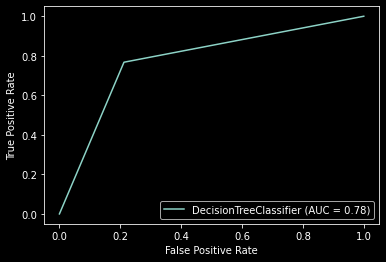

In [61]:
plot_roc_curve(dtc, X_test, y_test)

Confusion matrix:
 [[26  7]
 [10 33]]


<ipython-input-62-b9c5a72f4b28>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-62-b9c5a72f4b28>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


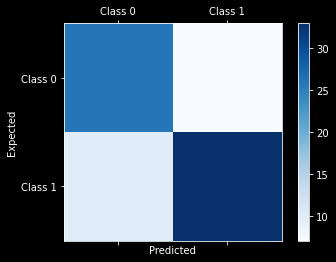

In [62]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))

Accuracy: 77.63%
Recall: 76.74%


### Visualizando a árvore

In [64]:
from sklearn import tree

[Text(1420.953488372093, 2310.2999999999997, 'thal_2 <= 0.5\ngini = 0.497\nsamples = 227\nvalue = [105, 122]'),
 Text(739.6744186046512, 2038.5, 'cp_0 <= 0.5\ngini = 0.365\nsamples = 104\nvalue = [79, 25]'),
 Text(389.3023255813954, 1766.6999999999998, 'ca <= 0.5\ngini = 0.498\nsamples = 34\nvalue = [16, 18]'),
 Text(155.72093023255815, 1494.9, 'oldpeak <= 0.25\ngini = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(77.86046511627907, 1223.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(233.58139534883722, 1223.1, 'thalach <= 143.0\ngini = 0.492\nsamples = 16\nvalue = [7, 9]'),
 Text(155.72093023255815, 951.3000000000002, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(311.4418604651163, 951.3000000000002, 'chol <= 231.5\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(155.72093023255815, 679.5, 'chol <= 205.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(77.86046511627907, 407.7000000000003, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(233.58139534883722, 407.700000

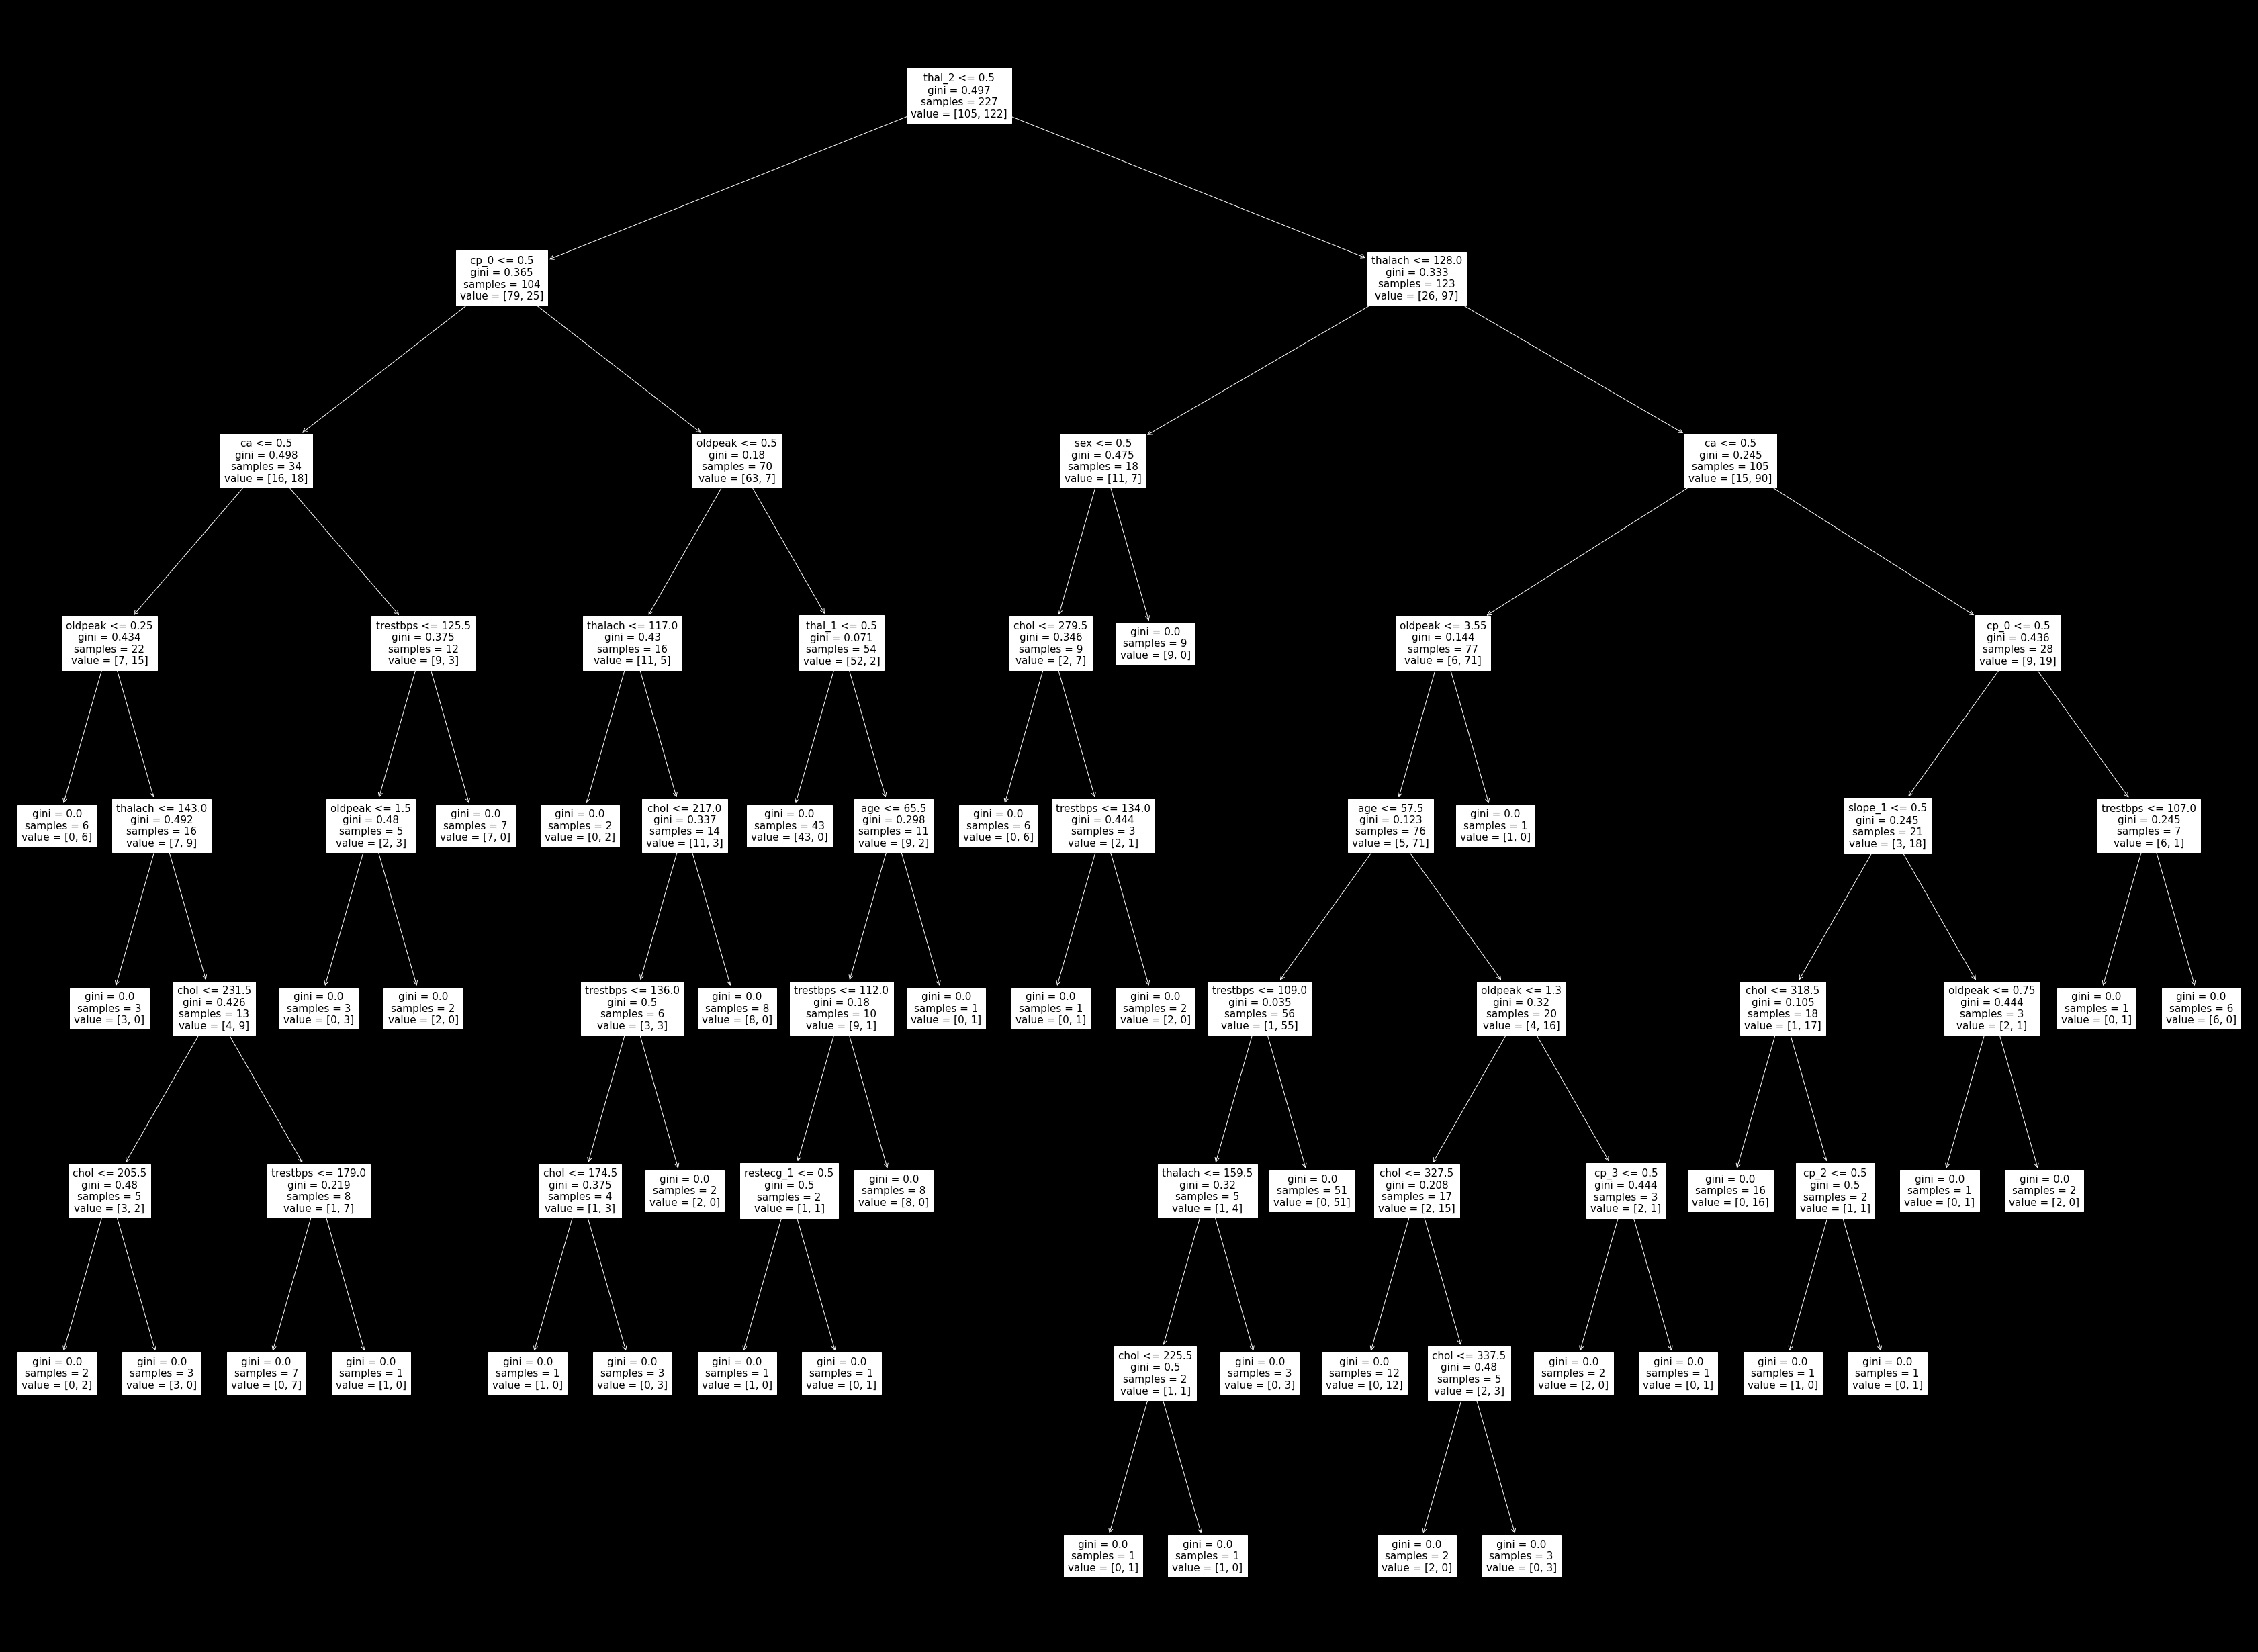

In [65]:
plt.figure(figsize=(60,45))

plt.style.use('dark_background')
plt.rcParams['text.color'] = 'black'
tree.plot_tree(dtc, feature_names=X.columns)  

### Escolhendo melhor max_depth (hiperparâmetro)

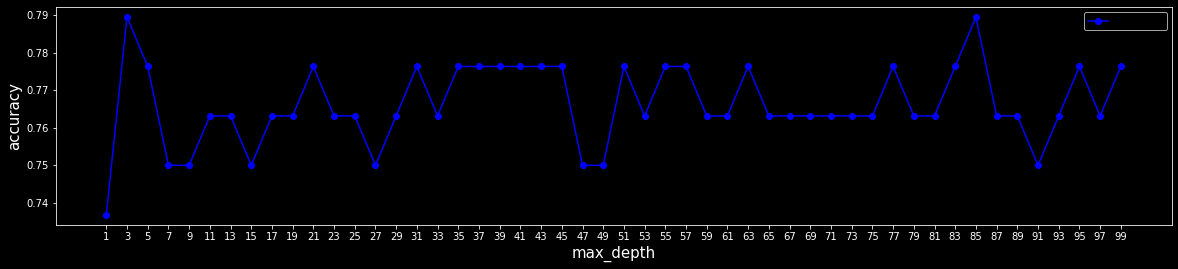

In [66]:
max_depth = np.arange(1, 100, 2)
train_error = []
test_error = []

plt.rcParams['text.color'] = 'black'
for i in max_depth:
    model = DecisionTreeClassifier(splitter = "best", max_depth = i)
    model.fit(X_train, y_train)
    
    y_pred_test = model.predict(X_test)
    
    test_error.append(accuracy_score(y_test, y_pred_test))
    

plt.figure(figsize=(20,4))
plt.plot(max_depth, test_error, '-bo', color= "blue", label = "Test Error")
plt.xlabel('max_depth', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
plt.xticks(max_depth)
plt.legend()
plt.show(True)

## Random Forest

### Sampling

In [67]:
# Separando a base
y = df_one.loc[:,'target']
X = df_one.drop(columns=['target'])

### Treinando Modelo

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc = RandomForestClassifier()

### Cross Validation

Explicação do que é cross validation: https://www.youtube.com/watch?v=fSytzGwwBVw

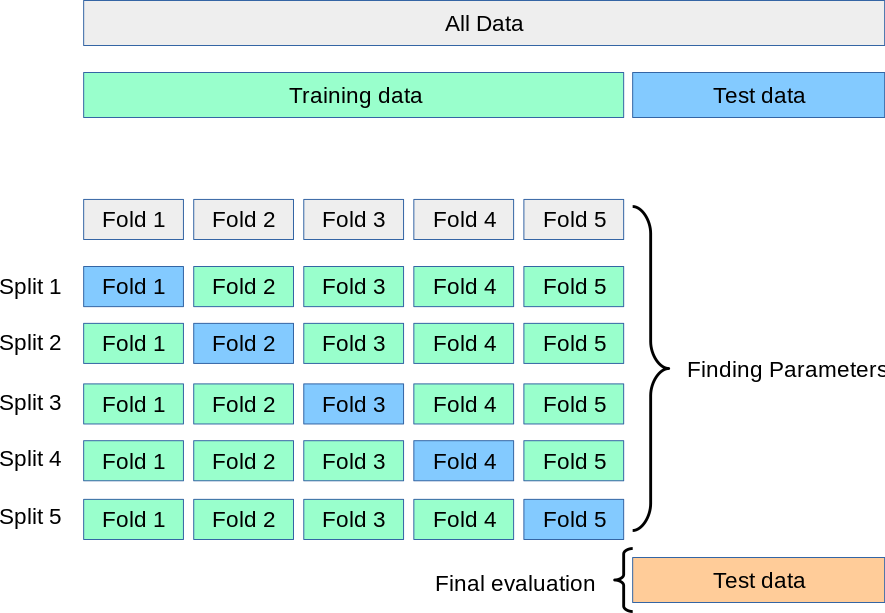

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [71]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rfc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

scores.mean()

0.8227956989247311

## Gradient Boosting

Default parameters

max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='reg:squarederror', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain'

### Treinando o Modelo

In [72]:
# !pip install xgboost
from xgboost import XGBClassifier

In [73]:
xgb = XGBClassifier()

Se for fazer separando a base em treino em teste use:

xgb.fit(X_train, y_train)

### Grid Search

Fonte do Grid Search: https://www.kaggle.com/felipefiorini/xgboost-hyper-parameter-tuning

Como irei modelar procurando os melhores hiperparametros, irei usar:

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X, y):
    param_tuning = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'n_estimators': [100, 200, 500, 1000]}

    xgb_model = XGBClassifier(use_label_encoder=False)

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X,y)

    return gsearch.best_params_, gsearch.best_score_, gsearch.best_estimator_.feature_importances_

In [76]:
%%time
g = hyperParameterTuning(X, y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.0min finished


[18:22:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1min 2s


In [77]:
# hiperparâmetros
g[0]

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

In [78]:
print ("acurácia:", g[1])

acurácia: 0.8248633879781421


Text(0.5, 1.0, 'Feature Importance')

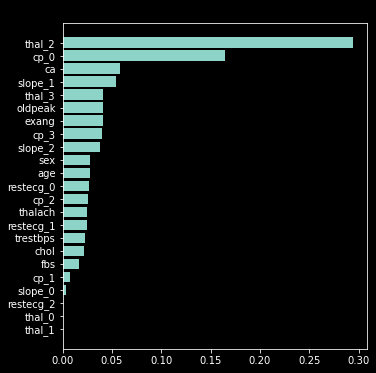

In [79]:
feature_importance = g[2]
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')

### Random Search

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X, y):
    param_tuning = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 200, 500, 1000]}

    xgb_model = XGBClassifier(use_label_encoder=False)

    rsearch = RandomizedSearchCV(estimator = xgb_model,
                           param_distributions = param_tuning,                        
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    rsearch.fit(X,y)

    return rsearch.best_params_, rsearch.best_score_, rsearch.best_estimator_.feature_importances_

In [82]:
%%time
r = hyperParameterTuning(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.8s finished


[18:22:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 6.09 s


In [83]:
# hiperparâmetros
r[0]

{'subsample': 0.5,
 'n_estimators': 200,
 'max_depth': 10,
 'learning_rate': 0.1,
 'colsample_bytree': 0.5,
 'colsample_bylevel': 0.8999999999999999}

In [84]:
print ("acurácia:", r[1])

acurácia: 0.821639344262295


Text(0.5, 1.0, 'Feature Importance')

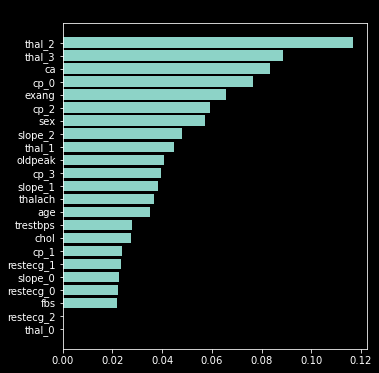

In [85]:
feature_importance = r[2]
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')